In [1]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
news_data=pd.read_csv(r'F:\Combined_News_DJIA.csv')

In [3]:
news_data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [4]:
news_data.shape

(1989, 27)

In [5]:
##checck count of labes
news_data['Label'].value_counts()

1    1065
0     924
Name: Label, dtype: int64

In [6]:
##check for nul values
round(((news_data.isnull().sum())/(news_data.shape[0]))*100,2)

Date     0.00
Label    0.00
Top1     0.00
Top2     0.00
Top3     0.00
Top4     0.00
Top5     0.00
Top6     0.00
Top7     0.00
Top8     0.00
Top9     0.00
Top10    0.00
Top11    0.00
Top12    0.00
Top13    0.00
Top14    0.00
Top15    0.00
Top16    0.00
Top17    0.00
Top18    0.00
Top19    0.00
Top20    0.00
Top21    0.00
Top22    0.00
Top23    0.05
Top24    0.15
Top25    0.15
dtype: float64

In [7]:
##drop null values
news_data.dropna(inplace=True)

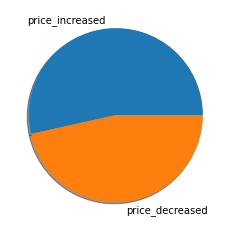

In [8]:
##plotting labels
plt.pie(news_data['Label'].value_counts(),shadow=True,labels=['price_increased','price_decreased'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


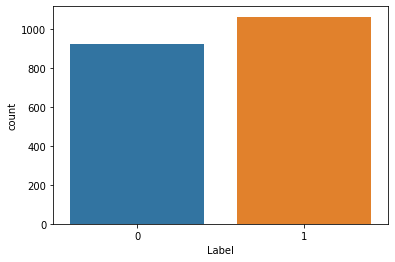

In [9]:
sns.countplot(news_data['Label'])
plt.show()

In [12]:
df_train = news_data[news_data['Date'] < '20150101']
df_test = news_data[news_data['Date'] > '20141231']

In [35]:
df_train.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."


In [13]:
## function to removing punctuations
def clean_data(dataset):
    data = dataset.iloc[:,2:27]
    data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
    return data

In [14]:
## function to convert all headlines into single coulumn
def combine_data(data):
    headlines = []
    for i in range(len(data.index)):
        headlines.append(' '.join(str(x) for x in data.iloc[i, :]))
    return headlines

In [15]:
## function to perform lemmatization 
def lemmatize_data(data, lemmatizer):
    cleaned_dataset = []
    for i in range(len(data)):
        clean_text = data[i].lower()
        clean_text = clean_text.split()
        clean_text = [lemmatizer.lemmatize(word) for word in clean_text if word not in stopwords.words('english')]
        cleaned_dataset.append(' '.join(clean_text))
    return cleaned_dataset

In [16]:
## cleaning train and test data
train_clean=clean_data(df_train)
test_clean=clean_data(df_test)

In [17]:
##single list
train_combined=combine_data(train_clean)
test_combined=combine_data(test_clean)

In [18]:
##lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmatizer=WordNetLemmatizer()
train_data=lemmatize_data(train_combined,lemmatizer)

In [19]:
test_data=lemmatize_data(test_combined,lemmatizer)

In [20]:
##count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
cv=CountVectorizer(ngram_range=(2,2))

In [22]:
train_data_new=cv.fit_transform(train_data)

In [23]:
test_data_new=cv.transform(test_data)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc=RandomForestClassifier(n_estimators=200,criterion='entropy')

In [28]:
rfc.fit(train_data_new,df_train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [29]:
y_test_pred=rfc.predict(test_data_new)

In [31]:
from sklearn import metrics
metrics.accuracy_score(df_test['Label'],y_test_pred)

0.8492063492063492

In [32]:
metrics.confusion_matrix(df_test['Label'],y_test_pred)

array([[130,  56],
       [  1, 191]], dtype=int64)

In [33]:
metrics.roc_auc_score(df_test['Label'],y_test_pred)

0.8468581989247311

In [36]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(df_test['Label'],y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82       186
           1       0.77      0.99      0.87       192

    accuracy                           0.85       378
   macro avg       0.88      0.85      0.85       378
weighted avg       0.88      0.85      0.85       378



In [ ]:
## word embedding 

In [67]:
y=news_data.pop('Label')


In [68]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Label, dtype: int64

In [70]:
 clean_data=clean_data(news_data)

TypeError: 'DataFrame' object is not callable

In [41]:
combine_data= combine_data(clean_data)

In [43]:
data=lemmatize_data(combine_data,lemmatizer)

In [45]:
len(data)

1986

In [46]:
from keras.preprocessing.text import Tokenizer

In [54]:
tokenizer=Tokenizer(10000)
tokenizer.fit_on_texts(data)

In [55]:
sequences=tokenizer.texts_to_sequences(data)

In [56]:
len(sequences)

1986

In [57]:
from keras.preprocessing.sequence import pad_sequences

In [59]:
data=pad_sequences(sequences,maxlen=100)

In [61]:
data.shape

(1986, 100)

In [62]:
data[0]

array([  13,   80, 1088,  266, 9936,  860, 7076,  488, 1186,   15,    1,
        107,  665,   94,  468, 2917,    1, 9937, 2745,    2,   71,  434,
        849,   17,   91,   23,   17,  553,   37, 5642, 7077,    9, 1776,
       1151,  146,   38, 4721,    1, 4939,   57,  103,  327, 1109,    6,
        446,   23,   39,   47, 1706,    1,  860, 2137,  126,   83,  179,
        232,   25,   45,  860, 7078,  494,   55, 2644,    1, 1331,  453,
       2138,   23,  868, 1240,    2,   46,   48,    5,   34,    1, 5400,
        155,  860, 7559,   55, 2644,    1,  200, 1796, 1378,  136,  237,
          1, 3123, 1475, 2225, 2798,  339,  932,    1,  179,  124, 1895,
       2107])

In [84]:
from keras.layers import LSTM,Dense,Embedding,SimpleRNN,Flatten
from keras import Sequential

In [85]:
#embedding_dimensions=40
model=Sequential()
model.add(Embedding(10000,100,input_length=100))
model.add(SimpleRNN(100))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 100)               20100     
_________________________________________________________________
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 1,026,629
Trainable params: 1,026,629
Non-trainable params: 0
_________________________________________________________________
None


In [86]:
X_final=np.array(data)
y_final=np.array(y)

In [73]:
X_final

array([[  13,   80, 1088, ...,  124, 1895, 2107],
       [   1,  377,   24, ..., 2196,  143,  183],
       [ 666,  387,   13, ..., 1824,   50,  211],
       ...,
       [1235,  532,  255, ..., 1058, 2529, 7368],
       [2051,  508,   13, ...,  205,   19, 1362],
       [  77,   51, 3270, ...,  619, 4690,  155]])

In [74]:
from sklearn.model_selection import train_test_split

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,train_size=0.8,random_state=42)

In [76]:
X_train.shape

(1588, 100)

In [77]:
y_train.shape

(1588,)

In [88]:
##model training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30,batch_size=62)

Epoch 1/30
26/26 [==============================] - 4s 91ms/step - loss: 0.7040 - accuracy: 0.5073 - val_loss: 0.7079 - val_accuracy: 0.5302
Epoch 2/30
26/26 [==============================] - 2s 79ms/step - loss: 0.5836 - accuracy: 0.7182 - val_loss: 0.8949 - val_accuracy: 0.4749
Epoch 3/30
26/26 [==============================] - 2s 79ms/step - loss: 0.1537 - accuracy: 0.9721 - val_loss: 1.0673 - val_accuracy: 0.5126
Epoch 4/30
26/26 [==============================] - 2s 84ms/step - loss: 0.0114 - accuracy: 0.9994 - val_loss: 1.2537 - val_accuracy: 0.4849
Epoch 5/30
26/26 [==============================] - 2s 84ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.4231 - val_accuracy: 0.4698
Epoch 6/30
26/26 [==============================] - 2s 81ms/step - loss: 4.8608e-04 - accuracy: 1.0000 - val_loss: 1.4489 - val_accuracy: 0.4824
Epoch 7/30
26/26 [==============================] - 2s 80ms/step - loss: 2.5049e-04 - accuracy: 1.0000 - val_loss: 1.4771 - val_accuracy: 0.4824
Epoch